<p><h2><b>Name  :- Vaishnavi R. Tale</b></h></p>
<p><h2><b>Topic :- Regression</b></h></p>


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**



<p><h1><b><font color='DarkBlue'>Context</b></h1></p>

This dataset is about the Wind Turbines Power generation.In Wind Turbines, Scada Systems measure and save data's like wind speed, wind direction and generated power etc. for 10 mins intervals.This file was taken from wind turbine's scada system that is working Turkey.

Dataset Link :-https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset
<p><h1><b><font color='DarkBlue'>Content</b></h1></p>
The data's in the file are:

-  Date/Time for 10 mins interval
- LV ActivePower (kW): The Power generated for the moment
- Wind Speed (m/s):  The wind speed at the hub height of turbine, wind speed is use for power generation
- Theoretical_Power_Curve (KWh): The theoretical power values that the turbine generated with that wind speed
- Wind Direction (°): The wind directon at the hub height of the turbine

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=2be9ac66d168d48479821a6b64f16a5c45e934a1c146e133e8a31f77770359a7
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
# importing pyspark libraries
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder.master("local").appName("wind_turbine").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local appName=wind_turbine>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving T1.csv to T1.csv


In [ ]:
# Reading the dataset as Spark DataFrame
spark_df = spark.read.csv('T1.csv', header=True, inferSchema=True)

#cacheing datasets
spark_df.cache()

# Converting all the name of columns to lower case
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns])

print("Show the dataset")
print(spark_df.show(5))
print()
print("What are the variables data types in the data?")
print(spark_df.printSchema())
print()
print('Size of Data')
print(spark_df.count())

Show the dataset
+----------------+-------------------+----------------+-----------------------------+------------------+
|       date/time|lv activepower (kw)|wind speed (m/s)|theoretical_power_curve (kwh)|wind direction (°)|
+----------------+-------------------+----------------+-----------------------------+------------------+
|01 01 2018 00:00|   380.047790527343|5.31133604049682|             416.328907824861|  259.994903564453|
|01 01 2018 00:10|    453.76919555664|5.67216682434082|             519.917511061494|   268.64111328125|
|01 01 2018 00:20|   306.376586914062|5.21603679656982|             390.900015810951|  272.564788818359|
|01 01 2018 00:30|   419.645904541015|5.65967416763305|             516.127568975674|  271.258087158203|
|01 01 2018 00:40|   380.650695800781|5.57794094085693|             491.702971953588|  265.674285888671|
+----------------+-------------------+----------------+-----------------------------+------------------+
only showing top 5 rows

None

What ar

In [ ]:
# Extracting the substring from the data into month and hour

from pyspark.sql.functions import substring
spark_df = spark_df.withColumn("month", substring("date/time", 4,2))
spark_df = spark_df.withColumn("hour", substring("date/time", 12,2))

# Converting string month and hour variables to integer
from pyspark.sql.types import IntegerType
spark_df = spark_df.withColumn('month', spark_df.month.cast(IntegerType()))
spark_df = spark_df.withColumn('hour', spark_df.hour.cast(IntegerType()))

print(spark_df.show(5))

+----------------+-------------------+----------------+-----------------------------+------------------+-----+----+
|       date/time|lv activepower (kw)|wind speed (m/s)|theoretical_power_curve (kwh)|wind direction (°)|month|hour|
+----------------+-------------------+----------------+-----------------------------+------------------+-----+----+
|01 01 2018 00:00|   380.047790527343|5.31133604049682|             416.328907824861|  259.994903564453|    1|   0|
|01 01 2018 00:10|    453.76919555664|5.67216682434082|             519.917511061494|   268.64111328125|    1|   0|
|01 01 2018 00:20|   306.376586914062|5.21603679656982|             390.900015810951|  272.564788818359|    1|   0|
|01 01 2018 00:30|   419.645904541015|5.65967416763305|             516.127568975674|  271.258087158203|    1|   0|
|01 01 2018 00:40|   380.650695800781|5.57794094085693|             491.702971953588|  265.674285888671|    1|   0|
+----------------+-------------------+----------------+-----------------

<p><h1><font color='Darkblue'><b>Exploratory Data Analysis</h1></p>

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
spark_df.select('wind speed (m/s)', 'theoretical_power_curve (kwh)', 'lv activepower (kw)').toPandas().describe()

,wind speed (m/s),theoretical_power_curve (kwh),lv activepower (kw)
count,50530.00,50530.00,50530.00
mean,7.56,1492.18,1307.68
std,4.23,1368.02,1312.46
min,0.00,0.00,-2.47
25%,4.20,161.33,50.68
50%,7.10,1063.78,825.84
75%,10.30,2964.97,2482.51
max,25.21,3600.00,3618.73


**To create the visualization from the big data we create the random samples of the big data**

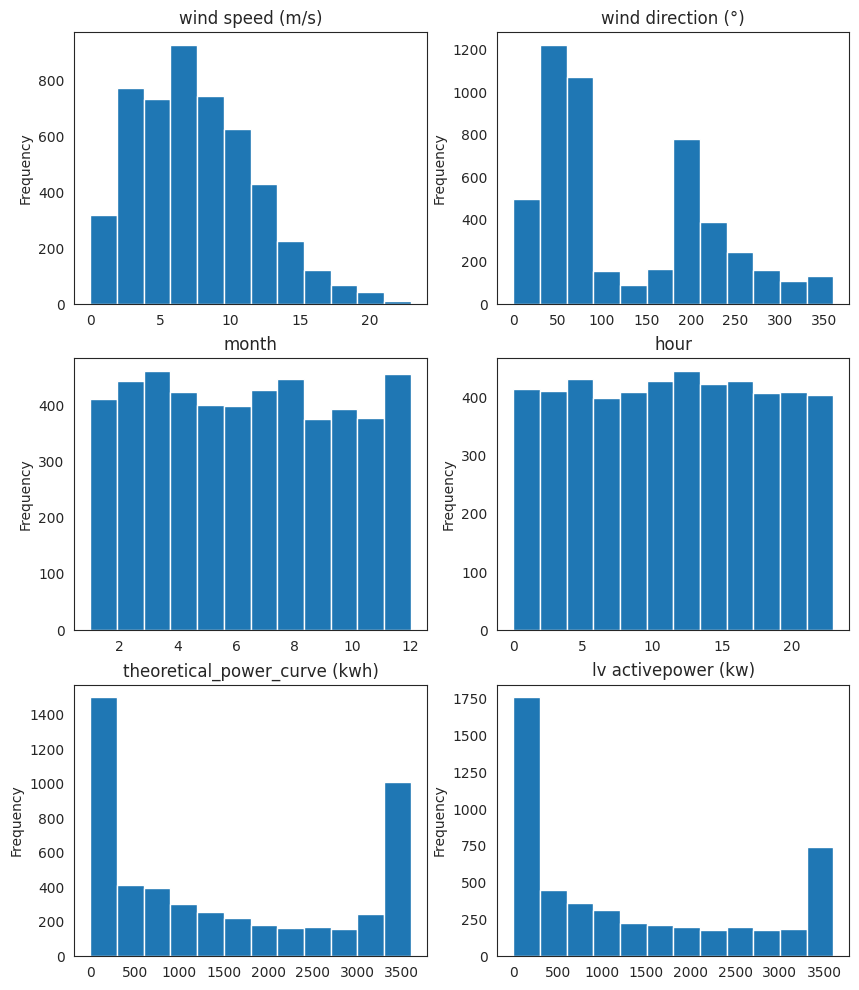

In [ ]:
# Taking a random sample from the big data
sample_df = spark_df.sample(withReplacement=False, fraction=0.1, seed=42).toPandas()

# Visualizing the distributions with the sample data
columns = ['wind speed (m/s)', 'wind direction (°)', 'month', 'hour', 'theoretical_power_curve (kwh)', 'lv activepower (kw)']
i=1
plt.figure(figsize=(10,12))
for each in columns:
    plt.subplot(3,2,i)
    sample_df[each].plot.hist(bins=12)
    plt.title(each)
    i += 1

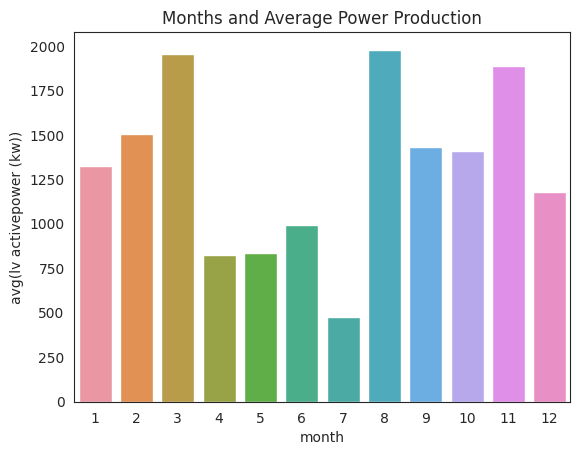

In [ ]:
# Average power production by month
monthly = spark_df.groupby('month').mean('lv activepower (kw)').sort('avg(lv activepower (kw))').toPandas()
sns.barplot(x='month', y='avg(lv activepower (kw))', data=monthly)
plt.title('Months and Average Power Production');

**From above graph we can see that month March, August and November have higher power production.**

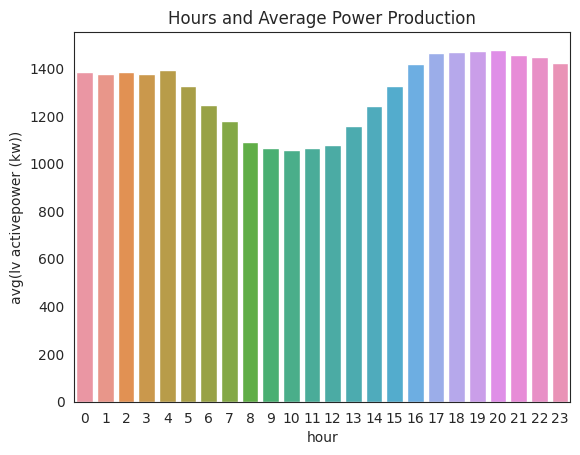

In [ ]:
# Average power production by hour
hourly = spark_df.groupby('hour').mean('lv activepower (kw)').sort('avg(lv activepower (kw))').toPandas()
sns.barplot(x='hour', y='avg(lv activepower (kw))', data=hourly)
plt.title('Hours and Average Power Production');

**From above graph we can see that daily average power production is Lower between 03:00 to 15:00.**

,wind speed (m/s),wind direction (°),month,hour,theoretical_power_curve (kwh),lv activepower (kw)
wind speed (m/s),1.00,-0.08,-0.01,0.03,0.95,0.91
wind direction (°),-0.08,1.00,-0.18,0.00,-0.11,-0.06
month,-0.01,-0.18,1.00,-0.01,-0.00,0.04
hour,0.03,0.00,-0.01,1.00,0.03,0.03
theoretical_power_curve (kwh),0.95,-0.11,-0.00,0.03,1.00,0.94
lv activepower (kw),0.91,-0.06,0.04,0.03,0.94,1.00


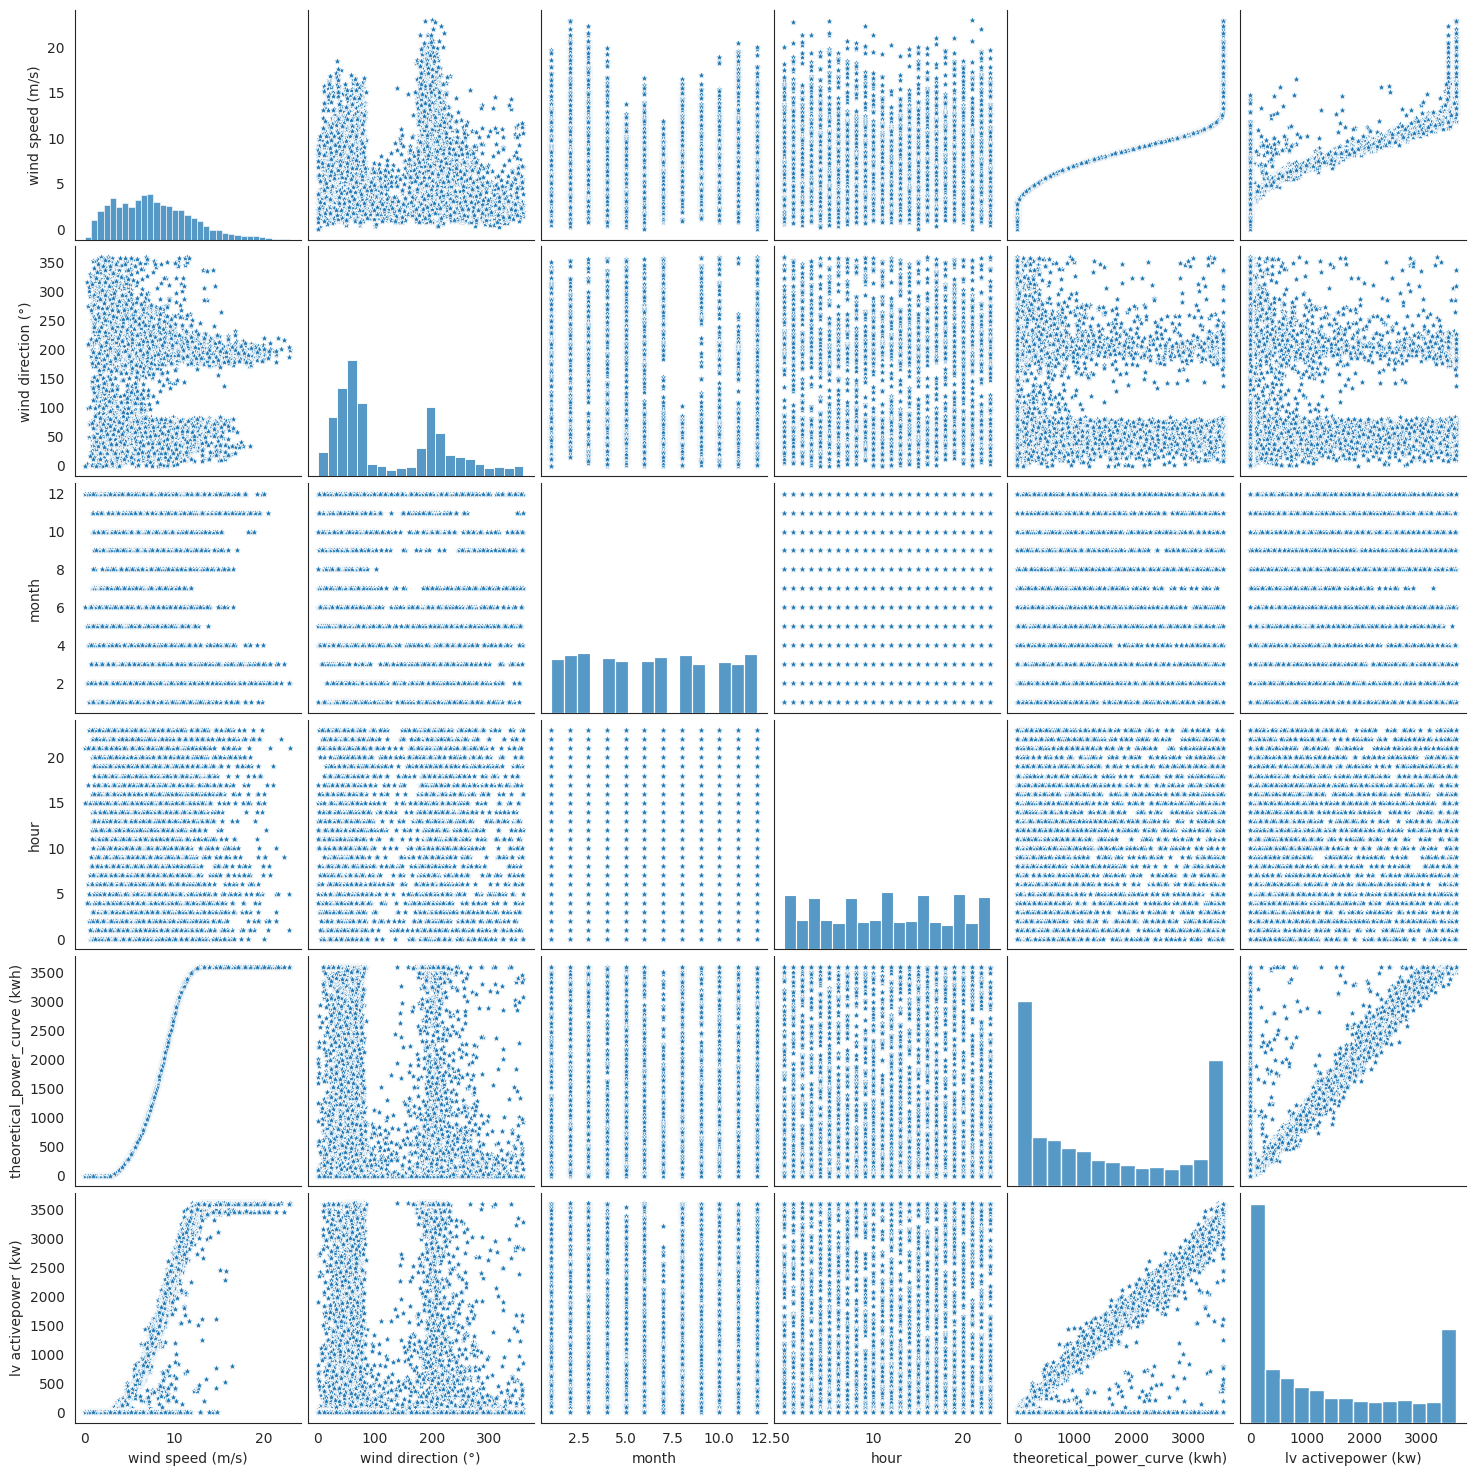

In [ ]:
display(sample_df[columns].corr())
sns.pairplot(sample_df[columns], markers='*')

**We can see Wind Speed and the Power production highly correlated, and there are lower power production for some Wind Direction**

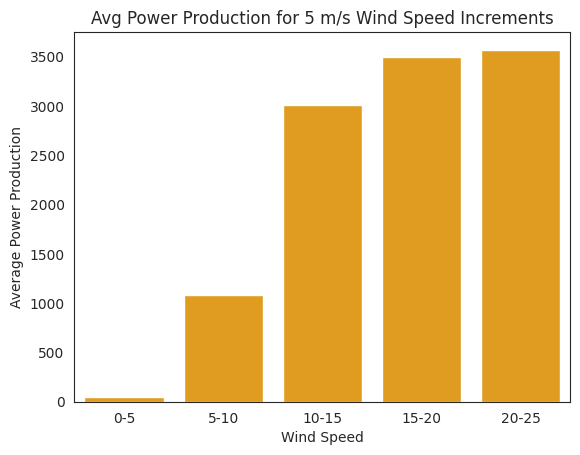

In [ ]:
# Finding average power production for 5 m/s wind speed increments
wind_speed = []
avg_power = []
for i in [0,5,10,15,20]:
    avg_value = spark_df.filter((spark_df['wind speed (m/s)'] > i) 
                                & (spark_df['wind speed (m/s)'] <= i+5))\
                                .agg({'lv activepower (kw)':'mean'}).collect()[0][0] 
    avg_power.append(avg_value)
    wind_speed.append(str(i) + '-' + str(i+5))

sns.barplot(x=wind_speed, y=avg_power, color='orange')
plt.title('Avg Power Production for 5 m/s Wind Speed Increments')
plt.xlabel('Wind Speed')
plt.ylabel('Average Power Production');

**From the above graph we can see that the power production reaches the maximum limit after wind speed reaches 15 m/s**

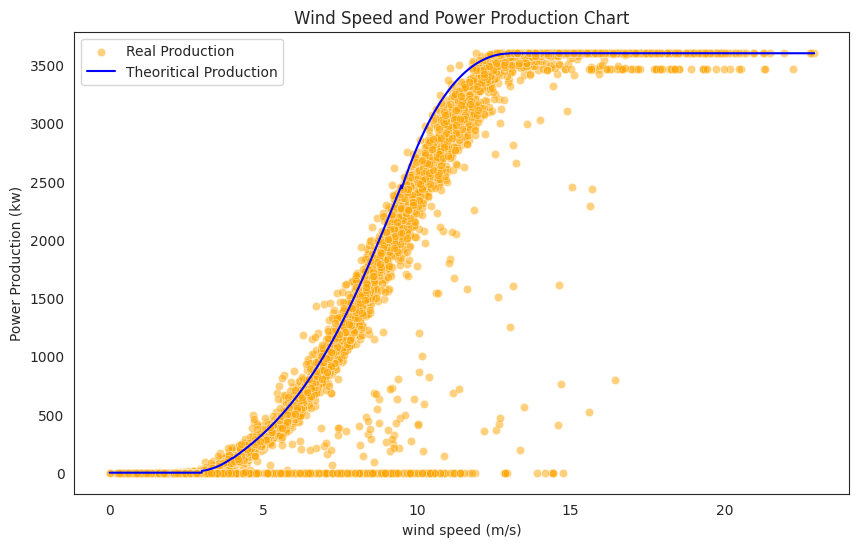

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='wind speed (m/s)', y='lv activepower (kw)', color='orange', label='Real Production', alpha=0.5, data=sample_df)
sns.lineplot(x='wind speed (m/s)', y='theoretical_power_curve (kwh)', color='blue', label='Theoritical Production', data=sample_df)
plt.title('Wind Speed and Power Production Chart')
plt.ylabel('Power Production (kw)');

**From above graph we can see that, the theoretical power production curve genraly perform well with real power production. And the power production reaches the maximum limit after wind speed reaches 15 m/s. Also we can see there are some 0 power production.**

,wind speed (m/s),theoretical_power_curve (kwh),lv activepower (kw)
3349,0.93,0.00,0.00
1644,1.26,0.00,0.00
3077,0.42,0.00,0.00
3676,2.13,0.00,0.00
1800,1.31,0.00,0.00


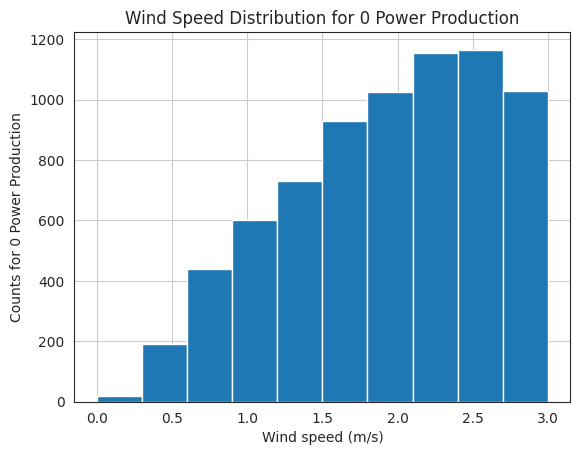

In [ ]:
# Filter the big data where the real and theoritical power productions are equal to 0
zero_theo_power = spark_df.filter((spark_df['lv activepower (kw)'] == 0)
                                  & (spark_df['theoretical_power_curve (kwh)'] == 0)).toPandas()

display(zero_theo_power[['wind speed (m/s)', 'theoretical_power_curve (kwh)', 'lv activepower (kw)']].sample(5))

# Let's see the wind speed distribution for 0 power production
zero_theo_power['wind speed (m/s)'].hist()
plt.title('Wind Speed Distribution for 0 Power Production')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Counts for 0 Power Production');

**From above graph we can see that there is no power production for the the wind speed less than 3 m/s.**

**But there are some observation where 0 power production evev they have wind speed more that 3 m/s.**

In [ ]:
# Observations for the wind speed > 3m/s and power production = 0, 
# While theoritically there should be power production
zero_power = spark_df.filter((spark_df['lv activepower (kw)'] == 0)
                            & (spark_df['theoretical_power_curve (kwh)'] != 0)
                            & (spark_df['wind speed (m/s)'] > 3)).toPandas()
display(zero_power.head())
print('No of Observations (while Wind Speed > 3 m/s and Power Production = 0): ', len(zero_power))

,date/time,lv activepower (kw),wind speed (m/s),theoretical_power_curve (kwh),wind direction (°),month,hour
0,03 01 2018 15:40,0.00,3.74,83.99,245.07,1,15
1,03 01 2018 16:40,0.00,3.03,17.18,221.09,1,16
2,03 01 2018 16:50,0.00,3.20,25.43,232.68,1,16
3,03 01 2018 17:00,0.00,3.91,110.98,241.97,1,17
4,04 01 2018 13:50,0.00,3.44,45.74,79.09,1,13


No of Observations (while Wind Speed > 3 m/s and Power Production = 0):  3497


**There are 3497 observations where the wind speed is more than 3 m/s but no power production**

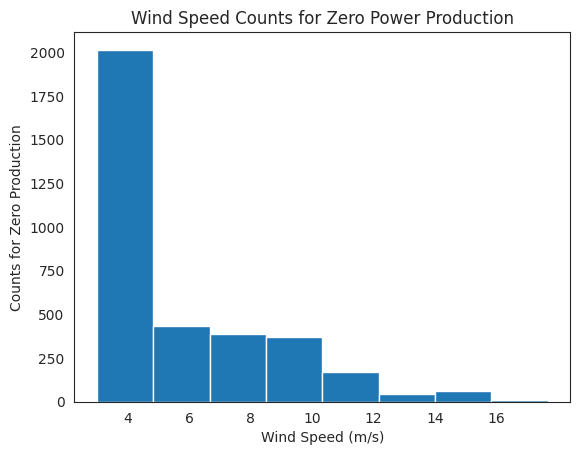

In [ ]:
zero_power['wind speed (m/s)'].plot.hist(bins=8)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Counts for Zero Production')
plt.title('Wind Speed Counts for Zero Power Production')
plt.xticks(ticks=np.arange(4,18,2));

**From the above graph we can see that the at wind speed 4 m/s there is high theshold for 0 power production, but there are aslo some observation having 0 power production while they have higher wind speed.**

**As we can't decide why these 0 power production cause, we simply concider those 3497 obsevations as outliers and remove them from the dataset**

In [ ]:
# Excluding the observations meeting the filter criterias 
spark_df = spark_df.filter(~((spark_df['lv activepower (kw)'] <= 0)
                            & (spark_df['theoretical_power_curve (kwh)'] != 0)
                            & (spark_df['wind speed (m/s)'] > 3)))

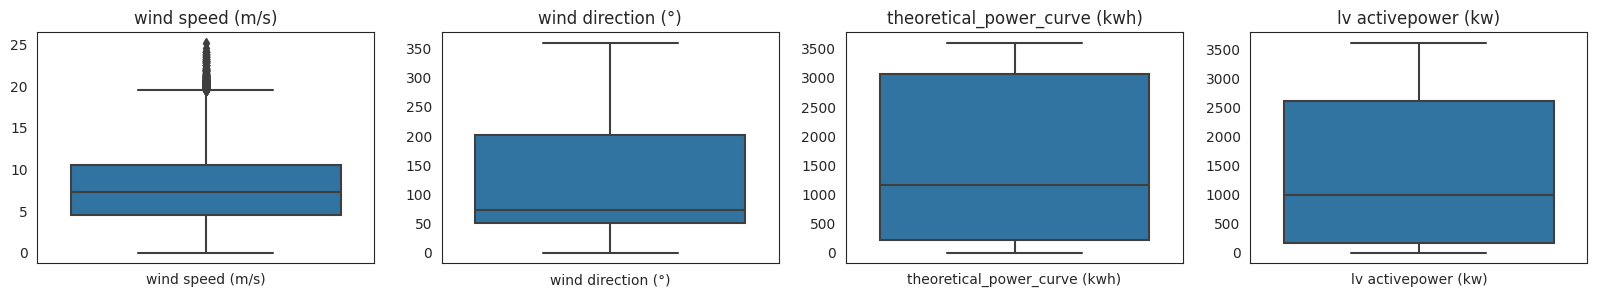

In [ ]:
columns = ['wind speed (m/s)', 'wind direction (°)', 'theoretical_power_curve (kwh)', 'lv activepower (kw)']
i=1
plt.figure(figsize=(20,3))
for each in columns:
    df = spark_df.select(each).toPandas()
    plt.subplot(1,4,i)
    sns.boxplot(df)
    plt.title(each)
    i += 1

**From above graph we can see that the wind speed data have some outliers.To find out the outliers we need to find out the upper and lower threshould values for the wind speed.**

In [ ]:
# Create a pandas df for visualization
wind_speed = spark_df.select('wind speed (m/s)').toPandas()

# Defining the quantiles and interquantile range
Q1 = wind_speed['wind speed (m/s)'].quantile(0.25)
Q3 = wind_speed['wind speed (m/s)'].quantile(0.75)
IQR = Q3-Q1
# Defining the lower and upper threshold values
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print('Quantile (0.25): ', Q1, '  Quantile (0.75): ', Q3)
print('Lower threshold: ', lower, ' Upper threshold: ', upper)

Quantile (0.25):  4.45994389057159   Quantile (0.75):  10.478565216064425
Lower threshold:  -4.567988097667663  Upper threshold:  19.506497204303678


In [ ]:
# Fancy indexing for outliers
outlier_tf = (wind_speed['wind speed (m/s)'] < lower) | (wind_speed['wind speed (m/s)'] > upper)

print('Total Number of Outliers: ', len(wind_speed['wind speed (m/s)'][outlier_tf]))
print('--'*15)
print('Some Examples of Outliers:')
print(wind_speed['wind speed (m/s)'][outlier_tf].sample(10))

Total Number of Outliers:  408
------------------------------
Some Examples of Outliers:
42738   20.25
3309    19.57
7504    19.53
3490    21.60
3545    21.81
8894    20.48
7448    19.99
2094    20.20
3259    24.09
3532    20.27
Name: wind speed (m/s), dtype: float64


**From above observation we can see that there are very few observation where the wind speed is greater than 19 m/s.**

In [ ]:
spark_df.select('wind speed (m/s)', 'lv activepower (kw)')\
.filter(spark_df['wind speed (m/s)'] >= 19)\
.agg({'lv activepower (kw)':'mean'}).show()

+------------------------+
|avg(lv activepower (kw))|
+------------------------+
|      3566.4634427974706|
+------------------------+



**By observing the average power production for the higher wind speed.
There only 407 observations where the wind speed is to high. So instead of erasing the outliers, Set the wind speed as 19 m/s for this observations.**

In [ ]:
from pyspark.sql import functions as F
spark_df = spark_df.withColumn('wind speed (m/s)', 
                               F.when(F.col('wind speed (m/s)') > 19.447, 19)
                               .otherwise(F.col('wind speed (m/s)')))

print("Size of Data:")
print(spark_df.count())

Size of Data:
47016


**From above analysis lets predict the high and low level power production for the above criterias before ML model**

In [ ]:
# High level power production
spark_df.filter(((spark_df['month'] == 3) | (spark_df['month'] == 8) | (spark_df['month'] == 11)) 
                & ((spark_df['hour'] >= 16) | (spark_df['hour'] <= 24)) 
                & ((spark_df['wind direction (°)'] > 0) | (spark_df['wind direction (°)'] < 90))
                & ((spark_df['wind direction (°)'] > 180) | (spark_df['wind direction (°)'] < 225))
               ).agg({'lv activepower (kw)':'mean'}).show()

+------------------------+
|avg(lv activepower (kw))|
+------------------------+
|      2013.4446757880403|
+------------------------+



In [ ]:
# Low level power production
spark_df.filter((spark_df['month'] == 7) 
                & ((spark_df['hour'] >= 9) | (spark_df['hour'] <= 11)) 
                & ((spark_df['wind direction (°)'] > 90) | (spark_df['wind direction (°)'] < 160))
               ).agg({'lv activepower (kw)':'mean'}).show()

+------------------------+
|avg(lv activepower (kw))|
+------------------------+
|       503.2834416603575|
+------------------------+



<p><h1><b><font color='DarkBlue'>Data Preparation For ML Algorithm</b></h1></p>

**Now we need to feed the model with the dataframe made of variable compressed in vector called as 'features' and target variable as 'labels'. For this conversion use the VectorAssembler.**

In [ ]:
# Preparing the independent variables (Features)
from pyspark.ml.feature import VectorAssembler

# Converting lv activepower (kw) variable as label
spark_df = spark_df.withColumn('label', spark_df['lv activepower (kw)'])

# Defining the variables to be used
variables = ['month', 'hour', 'wind speed (m/s)', 'wind direction (°)']
vectorAssembler = VectorAssembler(inputCols = variables, outputCol = 'features')
va_df = vectorAssembler.transform(spark_df)

# Combining features and label column
final_df = va_df.select('features', 'label')
final_df.show(10)

+--------------------+----------------+
|            features|           label|
+--------------------+----------------+
|[1.0,0.0,5.311336...|380.047790527343|
|[1.0,0.0,5.672166...| 453.76919555664|
|[1.0,0.0,5.216036...|306.376586914062|
|[1.0,0.0,5.659674...|419.645904541015|
|[1.0,0.0,5.577940...|380.650695800781|
|[1.0,0.0,5.604052...|402.391998291015|
|[1.0,1.0,5.793007...|447.605712890625|
|[1.0,1.0,5.306049...|     387.2421875|
|[1.0,1.0,5.584629...|463.651214599609|
|[1.0,1.0,5.523228...|439.725708007812|
+--------------------+----------------+
only showing top 10 rows



<p><h1><b><font color='DarkBlue'>Train Test Split</b></h1></p>

In [ ]:
#Spliting the data into train and test dataset
splits = final_df.randomSplit([0.8, 0.2])
train_df = splits[0]
test_df = splits[1]

print('Train dataset: ', train_df.count())
print('Test dataset : ', test_df.count())

Train dataset:  37566
Test dataset :  9450


<p><h1><b><font color='DarkBlue'>Creating ML Models</b></h1></p>

<p><h1><b>GBTRegressor</b></h1></p>

In [ ]:
from pyspark.ml.regression import GBTRegressor

In [ ]:
gbt=GBTRegressor(featuresCol='features',labelCol='label',maxIter=10)

model_gbt=gbt.fit(train_df)

df_test_pred = model_gbt.transform(test_df)

df_test_pred.show()

+--------------------+----------------+------------------+
|            features|           label|        prediction|
+--------------------+----------------+------------------+
|[1.0,0.0,3.991632...|140.936904907226| 98.54051675736866|
|[1.0,0.0,4.566956...|244.259399414062| 247.0525498864009|
|[1.0,0.0,4.917778...|248.946304321289|  333.600930938539|
|[1.0,0.0,5.149363...| 346.68569946289|  333.600930938539|
|[1.0,0.0,5.169603...|314.634796142578|  333.600930938539|
|[1.0,0.0,5.230740...|325.626312255859|  333.600930938539|
|[1.0,0.0,5.953317...|492.112487792968| 523.7679301437497|
|[1.0,0.0,6.278329...|791.083618164062| 621.1588252971998|
|[1.0,0.0,6.856492...|933.123291015625| 805.4610741335003|
|[1.0,0.0,7.288403...|1182.03503417968|1009.6062840168876|
|[1.0,0.0,7.648462...|1340.30395507812|1333.6873104153779|
|[1.0,0.0,8.328128...|1999.54602050781| 1696.961998549647|
|[1.0,0.0,8.779360...|  2169.958984375|1862.5502889432407|
|[1.0,0.0,8.891530...|2157.01806640625|1862.550288943240

In [ ]:
# Initial model success
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='label')

print('R2 SCORE : ', evaluator.evaluate(df_test_pred, {evaluator.metricName: 'r2'}))
print('MAE      : ', evaluator.evaluate(df_test_pred, {evaluator.metricName: 'mae'}))
print('RMSE     : ', evaluator.evaluate(df_test_pred, {evaluator.metricName: 'rmse'}))

R2 SCORE :  0.9756619833088815
MAE      :  91.0483353652118
RMSE     :  203.50222031831964


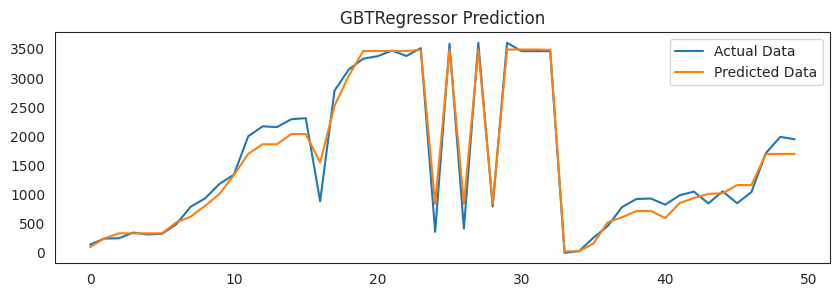

In [ ]:
df1=df_test_pred.select('label','prediction').toPandas()
plt.figure(figsize=(10,3))
plt.plot(df1.label[:50],label="Actual Data")
plt.plot(df1.prediction[:50], label="Predicted Data")
plt.legend()
plt.title("GBTRegressor Prediction")
plt.show()

<p><h1><b>Random Forest</h1></p>

In [ ]:
from pyspark.ml.regression import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(featuresCol='features',labelCol='label')

model_rf=rf.fit(train_df)

df_test_pred_rf = model_rf.transform(test_df)

df_test_pred_rf.show()

+--------------------+----------------+------------------+
|            features|           label|        prediction|
+--------------------+----------------+------------------+
|[1.0,0.0,3.991632...|140.936904907226|148.56563642596348|
|[1.0,0.0,4.566956...|244.259399414062|148.56563642596348|
|[1.0,0.0,4.917778...|248.946304321289|318.53644900799816|
|[1.0,0.0,5.149363...| 346.68569946289|321.99629260356215|
|[1.0,0.0,5.169603...|314.634796142578|318.53644900799816|
|[1.0,0.0,5.230740...|325.626312255859| 359.2249676435414|
|[1.0,0.0,5.953317...|492.112487792968|  522.556893836899|
|[1.0,0.0,6.278329...|791.083618164062| 736.2288152543244|
|[1.0,0.0,6.856492...|933.123291015625| 869.3830081141783|
|[1.0,0.0,7.288403...|1182.03503417968|1093.2916362178362|
|[1.0,0.0,7.648462...|1340.30395507812| 1299.346743335018|
|[1.0,0.0,8.328128...|1999.54602050781| 1510.915001752625|
|[1.0,0.0,8.779360...|  2169.958984375| 1956.469567975321|
|[1.0,0.0,8.891530...|2157.01806640625| 1956.46956797532

In [ ]:
evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='label')

print('R2 SCORE : ', evaluator.evaluate(df_test_pred_rf, {evaluator.metricName: 'r2'}))
print('MAE      : ', evaluator.evaluate(df_test_pred_rf, {evaluator.metricName: 'mae'}))
print('RMSE     : ', evaluator.evaluate(df_test_pred_rf, {evaluator.metricName: 'rmse'}))

R2 SCORE :  0.9644995740255509
MAE      :  146.34926842389783
RMSE     :  245.7781901090469


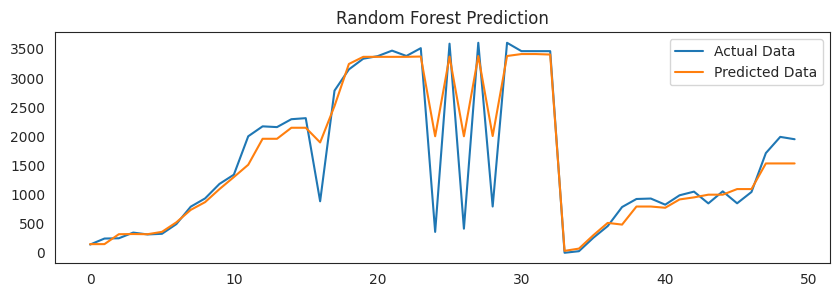

In [ ]:
df2=df_test_pred_rf.select('label','prediction').toPandas()
plt.figure(figsize=(10,3))
plt.plot(df2.label[:50],label="Actual Data")
plt.plot(df2.prediction[:50], label="Predicted Data")
plt.legend()
plt.title("Random Forest Prediction")
plt.show()

<p><h1><b>Decision Tree</b></h1></p>

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor(featuresCol='features',labelCol='label')

model_dt=dt.fit(train_df)

df_test_pred_dt = model_dt.transform(test_df)

df_test_pred_dt.show()

+--------------------+----------------+------------------+
|            features|           label|        prediction|
+--------------------+----------------+------------------+
|[1.0,0.0,3.991632...|140.936904907226| 120.3889291815969|
|[1.0,0.0,4.566956...|244.259399414062|195.00649976931712|
|[1.0,0.0,4.917778...|248.946304321289|287.74518544048834|
|[1.0,0.0,5.149363...| 346.68569946289|287.74518544048834|
|[1.0,0.0,5.169603...|314.634796142578|287.74518544048834|
|[1.0,0.0,5.230740...|325.626312255859|287.74518544048834|
|[1.0,0.0,5.953317...|492.112487792968| 572.5719634905788|
|[1.0,0.0,6.278329...|791.083618164062|  684.652487653432|
|[1.0,0.0,6.856492...|933.123291015625| 803.4945141807485|
|[1.0,0.0,7.288403...|1182.03503417968|1083.9962270218814|
|[1.0,0.0,7.648462...|1340.30395507812|1249.9298613766325|
|[1.0,0.0,8.328128...|1999.54602050781| 1633.073874713779|
|[1.0,0.0,8.779360...|  2169.958984375|1850.1835008159405|
|[1.0,0.0,8.891530...|2157.01806640625|1850.183500815940

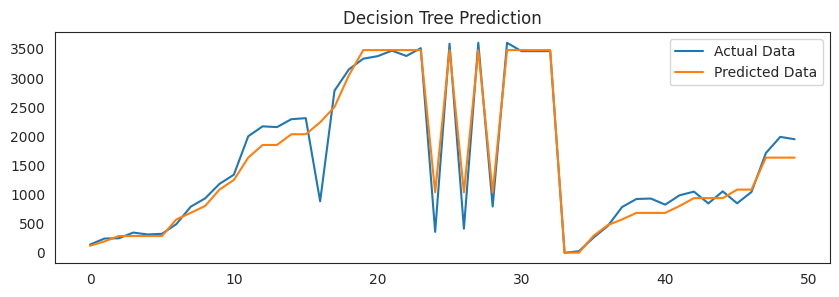

In [ ]:
df3=df_test_pred_dt.select('label','prediction').toPandas()
plt.figure(figsize=(10,3))
plt.plot(df3.label[:50],label="Actual Data")
plt.plot(df3.prediction[:50], label="Predicted Data")
plt.legend()
plt.title("Decision Tree Prediction")
plt.show()

In [ ]:
evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='label')

print('R2 SCORE : ', evaluator.evaluate(df_test_pred_dt, {evaluator.metricName: 'r2'}))
print('MAE      : ', evaluator.evaluate(df_test_pred_dt, {evaluator.metricName: 'mae'}))
print('RMSE     : ', evaluator.evaluate(df_test_pred_dt, {evaluator.metricName: 'rmse'}))

R2 SCORE :  0.9705907449731013
MAE      :  99.98304722039036
RMSE     :  223.70133268384944


<p><h1><b>Linear Regression</b></h1></p>

In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
Lr = LinearRegression(featuresCol='features',labelCol='label')

model_Lr=Lr.fit(train_df)

df_test_pred_Lr = model_Lr.transform(test_df)

df_test_pred_Lr.show()

+--------------------+----------------+------------------+
|            features|           label|        prediction|
+--------------------+----------------+------------------+
|[1.0,0.0,3.991632...|140.936904907226| 287.2360689060931|
|[1.0,0.0,4.566956...|244.259399414062|455.28792159202635|
|[1.0,0.0,4.917778...|248.946304321289| 558.4896959273617|
|[1.0,0.0,5.149363...| 346.68569946289| 624.9272498946275|
|[1.0,0.0,5.169603...|314.634796142578|    632.5332763192|
|[1.0,0.0,5.230740...|325.626312255859| 650.8336561708059|
|[1.0,0.0,5.953317...|492.112487792968| 849.7802792245245|
|[1.0,0.0,6.278329...|791.083618164062| 966.1183380197497|
|[1.0,0.0,6.856492...|933.123291015625| 1101.258888715139|
|[1.0,0.0,7.288403...|1182.03503417968|1243.5131309565231|
|[1.0,0.0,7.648462...|1340.30395507812|1366.5613101531767|
|[1.0,0.0,8.328128...|1999.54602050781|1558.0672645849681|
|[1.0,0.0,8.779360...|  2169.958984375|1690.0565294260605|
|[1.0,0.0,8.891530...|2157.01806640625|1722.439090557849

In [ ]:
evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='label')

print('R2 SCORE : ', evaluator.evaluate(df_test_pred_Lr, {evaluator.metricName: 'r2'}))
print('MAE      : ', evaluator.evaluate(df_test_pred_Lr, {evaluator.metricName: 'mae'}))
print('RMSE     : ', evaluator.evaluate(df_test_pred_Lr, {evaluator.metricName: 'rmse'}))

R2 SCORE :  0.8808833643967584
MAE      :  353.2122857544439
RMSE     :  450.207544854354


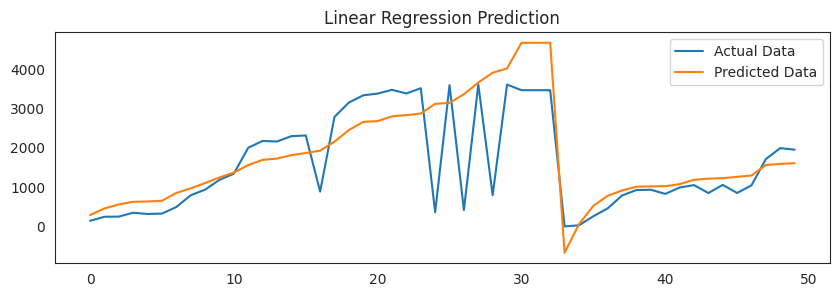

In [ ]:
df4=df_test_pred_Lr.select('label','prediction').toPandas()
plt.figure(figsize=(10,3))
plt.plot(df4.label[:50],label="Actual Data")
plt.plot(df4.prediction[:50], label="Predicted Data")
plt.legend()
plt.title("Linear Regression Prediction")
plt.show()

<p><h3><font color='Darkblue'><b>From the above Prediction graphs it is clear that the 'GBT Regressor' and 'Decision Tree Regressor' perform the best, As it gives the minimum error values for the given dataset and 'Linear Regression' model perform the worst.</b>
 